In [235]:
import numpy as np
import scipy
import skimage as sk
import skimage.io as skio
import skimage.transform as transform
import cv2
import matplotlib
import os

In [236]:
process = False

In [237]:
# read in the image
def read_image(imname, flag=False):
  im = skio.imread(imname, flag)
  return im

2
2


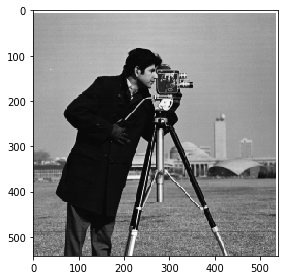

In [238]:
z = np.array([np.array([1, -1])])
print(z.ndim)
camera = read_image("sample_data/cameraman.png", True)
print(camera.ndim)
skio.imshow(camera)

skio.show()


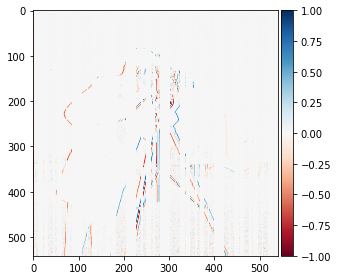

In [10]:
camera = read_image("sample_data/cameraman.png", True)

# Convolve with dx [1, -1]
def convolve_dx(im):
  dx = np.array([np.array([1, -1])])
  convolved_x = scipy.signal.convolve2d(im, dx, mode='same')
  return convolved_x

convolved_x = convolve_dx(camera)

skio.imshow(convolved_x)

skio.show()

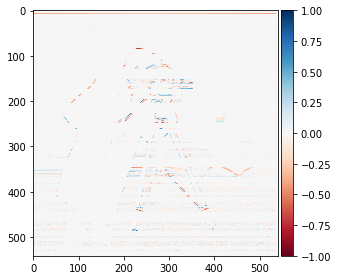

In [11]:
# Convolve with dy [1 ; -1]
def convolve_dy(im):
  dy = np.array([[1], [-1]])
  convolved_y = scipy.signal.convolve2d(im, dy, mode='same')
  return convolved_y

convolved_y = convolve_dy(camera)
skio.imshow(convolved_y)

skio.show()

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


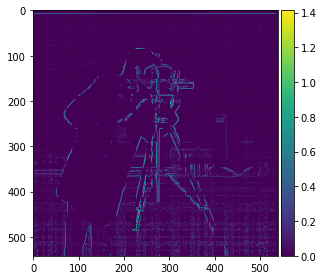

In [12]:
# Get the gradient magnitude image
def get_gradient_magnitude(convolved_x, convolved_y):
  convolved_x_square = np.square(convolved_x)
  convolved_y_square = np.square(convolved_y)
  summed = np.add(convolved_x_square, convolved_y_square)
  gradient_magnitude = np.sqrt(summed)
  return gradient_magnitude

gradient_magnitude = get_gradient_magnitude(convolved_x, convolved_y)
skio.imshow(gradient_magnitude)

skio.show()

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


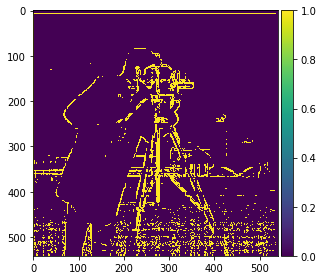

In [13]:
# Get edges by binarizing image

def binary_fn(num, threshold):
  if num >= threshold:
    return 1
  else:
    return 0

def array_for(x, threshold):
    return np.array([binary_fn(xi, threshold) for xi in x])

def binarize(im, threshold):
  result = []
  for array in im:
    result.append(array_for(array, threshold))
  return np.array(result)

binarized = binarize(gradient_magnitude, 0.09)

skio.imshow(binarized)

skio.show()

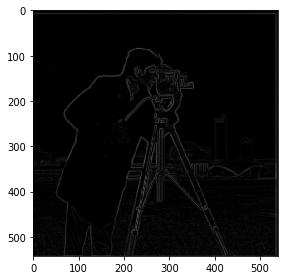

In [14]:
# Part 1.2: Gaussian
sigma = np.std(camera)
gaussian_1D = cv2.getGaussianKernel(13,1)
gaussian_2D = np.matmul(gaussian_1D, np.transpose(gaussian_1D))

convolved_gaussian = scipy.signal.convolve2d(camera, gaussian_2D, mode='same')
convolved_gaussian_dx = convolve_dx(convolved_gaussian)
convolved_gaussian_dy = convolve_dy(convolved_gaussian)

gaussian_magnitude = get_gradient_magnitude(convolved_gaussian_dx, convolved_gaussian_dy)

skio.imshow(gaussian_magnitude)

skio.show()

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


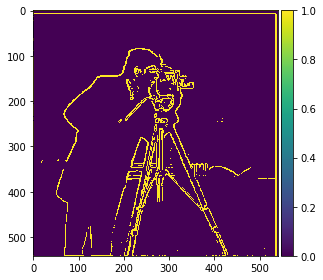

In [15]:
binarized_gaussian = binarize(gaussian_magnitude, 0.09)

skio.imshow(binarized_gaussian)

skio.show()

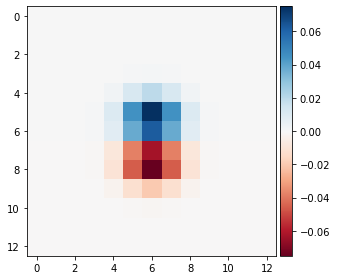

In [16]:
# Convolve the gaussian first: We should get the same results
convolved_gaussian_2Ddy = convolve_dy(gaussian_2D)
skio.imshow(convolved_gaussian_2Ddy)

skio.show()

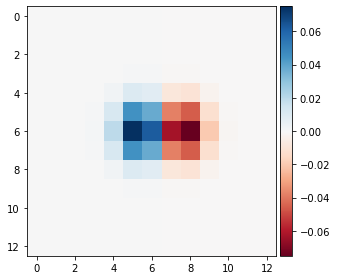

In [17]:
convolved_gaussian_2Ddx = convolve_dx(gaussian_2D)
skio.imshow(convolved_gaussian_2Ddx)

skio.show()

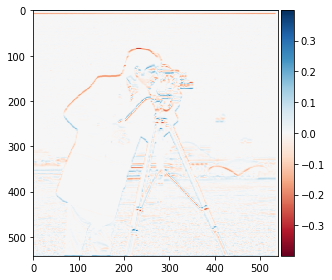

In [18]:
gaussian_convolved_y = scipy.signal.convolve2d(camera, convolved_gaussian_2Ddy, mode='same')

skio.imshow(gaussian_convolved_y)

skio.show()

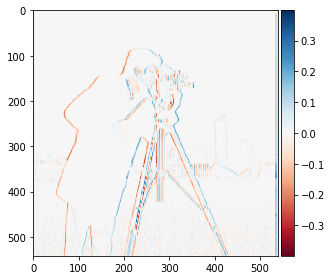

In [19]:
gaussian_convolved_x = scipy.signal.convolve2d(camera, convolved_gaussian_2Ddx, mode='same')
skio.imshow(gaussian_convolved_x)

skio.show()

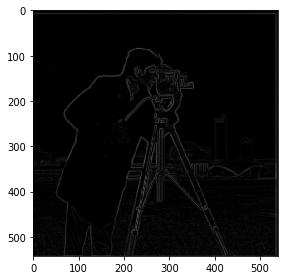

In [20]:
gaussian_2D_magnitude = get_gradient_magnitude(gaussian_convolved_x, gaussian_convolved_y)
skio.imshow(gaussian_2D_magnitude)

skio.show()

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


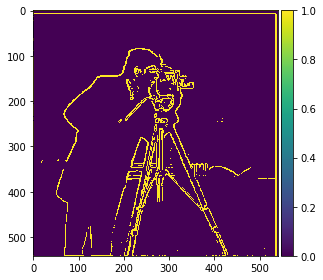

In [21]:
binarized_gaussian_reverse = binarize(gaussian_2D_magnitude, 0.09)

skio.imshow(binarized_gaussian_reverse)

skio.show()

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


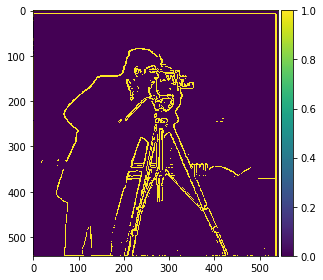

In [22]:
def get_image_edges(im, threshold):
  gaussian_1D = cv2.getGaussianKernel(5,1)
  gaussian_2D = np.matmul(gaussian_1D, np.transpose(gaussian_1D))

  blurred = scipy.signal.convolve2d(im, gaussian_2D, mode='same')

  convolved_gaussian_2Ddx = convolve_dx(blurred)
  convolved_gaussian_2Ddy = convolve_dy(blurred)
  gaussian_2D_magnitude = get_gradient_magnitude(convolved_gaussian_2Ddx, convolved_gaussian_2Ddy)
  binarized_gaussian = binarize(gaussian_2D_magnitude, threshold)

  return binarized_gaussian

x = get_image_edges(camera, 0.09)
skio.imshow(x)

skio.show()

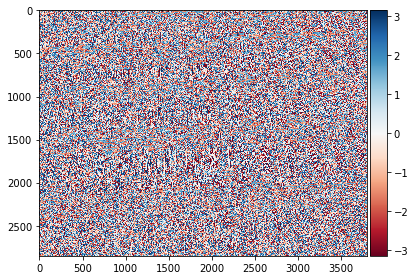

In [23]:
# 1.3: Image Straightening
facade = read_image("sample_data/facade.jpg", True)

def generate_angles(im):
  convolved_gaussian_2Ddx = convolve_dx(im)
  convolved_gaussian_2Ddy = convolve_dy(im)

  angles = np.arctan2(-convolved_gaussian_2Ddy, convolved_gaussian_2Ddx)
  return angles

blurred = scipy.signal.convolve2d(facade, gaussian_2D, mode='same')

convolved_gaussian_2Ddx = convolve_dx(blurred)
convolved_gaussian_2Ddy = convolve_dy(blurred)
facade_magnitude = get_gradient_magnitude(convolved_gaussian_2Ddx, convolved_gaussian_2Ddy)

angles = generate_angles(facade_magnitude)

skio.imshow(angles)

skio.show()

(array([[   0.,    0.,    0., ...,    0.,    0.,    0.],
        [1335.,   24.,    4., ...,    5.,    7., 1469.],
        [1164.,  107.,   44., ...,   24.,   79., 1329.],
        ...,
        [ 314.,  207.,  266., ...,  276.,  290.,  304.],
        [ 155.,   87.,  127., ...,  111.,  133.,  168.],
        [  18.,   13.,   22., ...,   34.,   29.,   29.]]),
 array([-3.14159265e+00, -2.51327412e+00, -1.88495559e+00, -1.25663706e+00,
        -6.28318527e-01,  2.57995136e-09,  6.28318533e-01,  1.25663706e+00,
         1.88495559e+00,  2.51327412e+00,  3.14159265e+00]),
 <a list of 3799 Lists of Patches objects>)

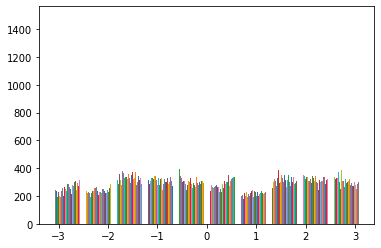

In [24]:
# Original orientation histogram
matplotlib.pyplot.hist(angles, bins=10)

In [25]:
def count_in_range(angles, radians, give):
  return ((angles <= radians + give) & (radians - give < angles)).sum()

def image_score(angles, give=1e-3):
  num_horizontal = count_in_range(angles, np.pi, give) + count_in_range(angles, 0, give)
  num_vertical = count_in_range(angles, np.pi/2, give) + count_in_range(angles, -np.pi/2, give)
  return (num_horizontal + num_vertical)/angles.size

def image_score_edges(angles, edges, give=1e-3):
  num_horizontal = count_in_range(angles, np.pi, give)
  num_vertical = count_in_range(angles, np.pi/2, give) + count_in_range(angles, -np.pi/2, give)
  return (num_horizontal + num_vertical)/edges

In [29]:
# Test a bunch of angles (angle + edge)
if process:
  gaussian_1D = cv2.getGaussianKernel(5,1)
  gaussian_2D = np.matmul(gaussian_1D, np.transpose(gaussian_1D))
  blurred = scipy.signal.convolve2d(facade, gaussian_2D, mode='same')
  angles = np.arange(-np.pi/10, np.pi/10+1e-5, np.pi/20)
  angles = np.arange(-10, 10, 1)
  scores = {}
  for angle in angles:
    rotated = scipy.ndimage.interpolation.rotate(blurred, angle)
    edges = get_image_edges(rotated, 0.015)
    x_len, y_len = np.shape(rotated)
    cropped = rotated[x_len//4:-x_len//4, y_len//4:-y_len//4]

    angles = generate_angles(rotated)
    angles[angles == 0] = np.pi
    edge_angles = np.multiply(angles, edges)
    num_edge_angles = np.sum(edges)
    score = image_score_edges(edge_angles, num_edge_angles, 0.01)
    scores[angle] = score
  scores

In [30]:
# Corrected Image
if process:
  facade_color = read_image("sample_data/facade.jpg")
  rotated = scipy.ndimage.interpolation.rotate(facade_color, -3)
  skio.imshow(rotated)

  skio.show()

  fname = 'facade_rotated.jpg'
  skio.imsave(fname, rotated)

In [31]:
def rotate_and_show(im, deg):
  rotated = scipy.ndimage.interpolation.rotate(im, deg)
  skio.imshow(rotated)

  skio.show()
  return rotated
  

  

In [32]:
def get_best_rotation_2(image):
  gaussian_1D = cv2.getGaussianKernel(5,1)
  gaussian_2D = np.matmul(gaussian_1D, np.transpose(gaussian_1D))
  blurred = scipy.signal.convolve2d(image, gaussian_2D, mode='same')
  # angles = np.arange(-np.pi/10, np.pi/10+1e-5, np.pi/20)
  angles = np.arange(-5, 6, 1)
  max_key = 0
  max_val = float('-INF')
  for angle in angles:
    rotated = scipy.ndimage.interpolation.rotate(blurred, angle)
    
    x_len, y_len = np.shape(rotated)
    cropped = rotated[x_len//4:-x_len//4, y_len//4:-y_len//4]
    edges = get_image_edges(cropped, 0.015)

    angles = generate_angles(cropped)
    angles[angles == 0] = np.pi
    edge_angles = np.multiply(angles, edges)
    num_edge_angles = np.sum(edges)
    score = image_score_edges(edge_angles, num_edge_angles, 0.01)
    print(str(angle) + ": " + str(score))
    if score > max_val:
      max_key = angle
      max_val = score
  return max_key

In [33]:
get_best_rotation_2(facade)

-5: 0.024209820223578052
-4: 0.025546519108450624
-3: 0.02576990663930966
-2: 0.025322256407300396
-1: 0.02396927974368375
0: 0.022573707294412906
1: 0.019936853188796646
2: 0.018263963002490217
3: 0.01665007053356568
4: 0.01563919733684042
5: 0.014428010945207289


-3

In [34]:
if process:
  korea = read_image("sample_data/korea.jpg", True)
  taiwan = read_image("sample_data/taiwan.jpg", True)
  taiwan_2 = read_image("sample_data/taiwan_2.jpg", True)
  london = read_image("sample_data/london.JPG", True)

  korea_color = read_image("sample_data/korea.jpg")
  taiwan_color = read_image("sample_data/taiwan.jpg")
  taiwan_2_color = read_image("sample_data/taiwan_2.jpg")
  london_color = read_image("sample_data/london.JPG")

  extras = [korea, taiwan, taiwan_2, london, facade]
  extras_color = [korea_color, taiwan_color, taiwan_2_color, london_color, facade_color]
  output_names = ["korea_rotated.jpg", "taiwan_rotated.jpg", "taiwan_2_rotated.jpg", "london_rotated.jpg", "facade_rotated.jpg"]
  best_rotations = []
  for i in range(len(extras)):
    best_rotation = get_best_rotation_2(extras[i])
    best_rotations.append(best_rotation)
    rotated = rotate_and_show(extras_color[i], best_rotation)

    skio.imsave(output_names[i], rotated)


In [36]:
def get_hist(im):
  im = im[x_len//4:-x_len//4, y_len//4:-y_len//4]
  angles = generate_angles(im)
  values = np.reshape(angles, angles.size)
  bins = np.arange(-np.pi, np.pi+np.pi/10, np.pi/20)
  result = matplotlib.pyplot.hist(values, bins=bins, density=True, stacked=True)
  return result

In [40]:
if process:
  for i in range(len(extras)):
    matplotlib.pyplot.figure()
    get_hist(extras[i])
    matplotlib.pyplot.figure()
    rotated = scipy.ndimage.interpolation.rotate(extras[i], best_rotations[i])
    get_hist(rotated)

In [41]:
def image_sharpen(im):
  gaussian_1D = cv2.getGaussianKernel(5,1)
  gaussian_2D = np.matmul(gaussian_1D, np.transpose(gaussian_1D))
  blurred = scipy.signal.convolve2d(im, gaussian_2D, mode='same')

  high_freq = np.subtract(im, blurred)

  added = np.add(im, high_freq)
  sharpened = np.clip(added, 0, 1)

  return sharpened

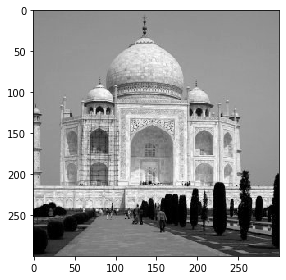

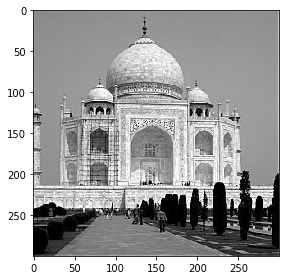

In [240]:
# Part 2.1: Image Sharpening
if process:
  taj = read_image("sample_data/taj.jpg", True)
  taj_clipped = np.clip(taj, 0, 1)
  skio.imshow(taj_clipped)

  skio.show()

  sharpened = image_sharpen(taj)
  skio.imshow(sharpened)
  skio.show()

  skio.imsave("taj.jpg", taj)
  skio.imsave("taj_sharpened.jpg", sharpened)

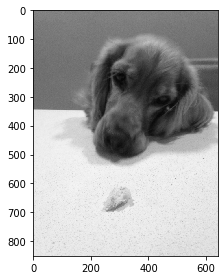

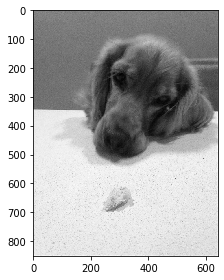

In [241]:
# Part 2.1: Image Sharpening (my own image)
if process:
  dog = read_image("sample_data/dog.jpg", True)
  dog_clipped = np.clip(dog, 0, 1)
  skio.imshow(dog_clipped)

  skio.show()

  dog_sharpened = image_sharpen(dog)
  skio.imshow(dog_sharpened)
  skio.show()

  skio.imsave("dog.jpg", dog)
  skio.imsave("dog_sharpened.jpg", dog_sharpened)

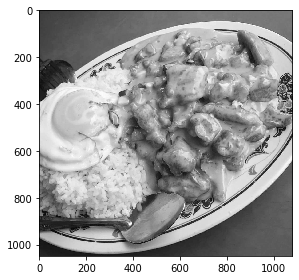

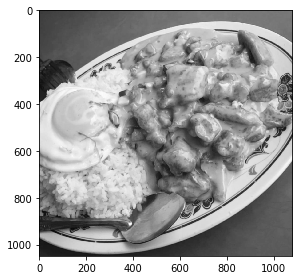

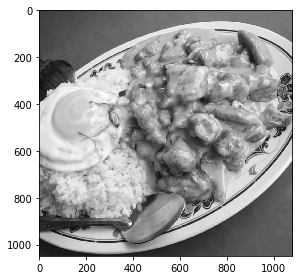

In [243]:
if process:  
  food = read_image("sample_data/salted_egg.jpg", True)
  food_clipped = np.clip(food, 0, 1)
  skio.imshow(food_clipped)
  skio.imsave("salted_egg_bw.jpg", food_clipped)
  skio.show()

  gaussian_1D = cv2.getGaussianKernel(8,1)
  gaussian_2D = np.matmul(gaussian_1D, np.transpose(gaussian_1D))
  blurred = scipy.signal.convolve2d(food, gaussian_2D, mode='same')
  skio.imshow(blurred)
  skio.show()
  skio.imsave("salted_egg_blurred.jpg", blurred)

  food_sharpened = image_sharpen(blurred)
  skio.imshow(food_sharpened)
  skio.show()

  skio.imsave("salted_egg_resharpened.jpg", food_sharpened)

In [45]:
# Part 2.2: Hybrid Images
# Starter code
def get_points(im1, im2):
    print('Please select 2 points in each image for alignment.')
    matplotlib.pyplot.imshow(im1)
    p1, p2 = matplotlib.pyplot.ginput(2)
    matplotlib.pyplot.close()
    matplotlib.pyplot.imshow(im2)
    p3, p4 = matplotlib.pyplot.ginput(2)
    matplotlib.pyplot.close()
    return (p1, p2, p3, p4)

def recenter(im, r, c):
    R, C, _ = im.shape
    rpad = (int) (np.abs(2*r+1 - R))
    cpad = (int) (np.abs(2*c+1 - C))
    return np.pad(
        im, [(0 if r > (R-1)/2 else rpad, 0 if r < (R-1)/2 else rpad),
             (0 if c > (C-1)/2 else cpad, 0 if c < (C-1)/2 else cpad),
             (0, 0)], 'constant')

def find_centers(p1, p2):
    cx = np.round(np.mean([p1[0], p2[0]]))
    cy = np.round(np.mean([p1[1], p2[1]]))
    return cx, cy

def align_image_centers(im1, im2, pts):
    p1, p2, p3, p4 = pts
    h1, w1, b1 = im1.shape
    h2, w2, b2 = im2.shape
    
    cx1, cy1 = find_centers(p1, p2)
    cx2, cy2 = find_centers(p3, p4)

    im1 = recenter(im1, cy1, cx1)
    im2 = recenter(im2, cy2, cx2)
    return im1, im2

def rescale_images(im1, im2, pts):
    p1, p2, p3, p4 = pts
    len1 = np.sqrt((p2[1] - p1[1])**2 + (p2[0] - p1[0])**2)
    len2 = np.sqrt((p4[1] - p3[1])**2 + (p4[0] - p3[0])**2)
    dscale = len2/len1
    if dscale < 1:
        im1 = transform.rescale(im1, dscale)
    else:
        im2 = transform.rescale(im2, 1./dscale)
    return im1, im2

def rotate_im1(im1, im2, pts):
    p1, p2, p3, p4 = pts
    theta1 = math.atan2(-(p2[1] - p1[1]), (p2[0] - p1[0]))
    theta2 = math.atan2(-(p4[1] - p3[1]), (p4[0] - p3[0]))
    dtheta = theta2 - theta1
    im1 = transform.rotate(im1, dtheta*180/np.pi)
    return im1, dtheta

def match_img_size(im1, im2):
    # Make images the same size
    h1, w1, c1 = im1.shape
    h2, w2, c2 = im2.shape
    if h1 < h2:
        im2 = im2[int(np.floor((h2-h1)/2.)) : -int(np.ceil((h2-h1)/2.)), :, :]
    elif h1 > h2:
        im1 = im1[int(np.floor((h1-h2)/2.)) : -int(np.ceil((h1-h2)/2.)), :, :]
    if w1 < w2:
        im2 = im2[:, int(np.floor((w2-w1)/2.)) : -int(np.ceil((w2-w1)/2.)), :]
    elif w1 > w2:
        im1 = im1[:, int(np.floor((w1-w2)/2.)) : -int(np.ceil((w1-w2)/2.)), :]
    assert im1.shape == im2.shape
    return im1, im2

def align_images(im1, im2):
    pts = get_points(im1, im2)
    im1, im2 = align_image_centers(im1, im2, pts)
    im1, im2 = rescale_images(im1, im2, pts)
    im1, angle = rotate_im1(im1, im2, pts)
    im1, im2 = match_img_size(im1, im2)
    return im1, im2

In [173]:
def get_high_freqs(im, sigma):
  gaussian_1D = cv2.getGaussianKernel(8, sigma)
  gaussian_2D = np.matmul(gaussian_1D, np.transpose(gaussian_1D))
  blurred = im
  for i in range(10):
    blurred = scipy.signal.convolve2d(blurred, gaussian_2D, mode='same')
  
  high_freq = np.subtract(im, blurred)
  clipped = np.clip(high_freq, 0, 1)
  return high_freq

def get_low_freqs(im, sigma):
  gaussian_1D = cv2.getGaussianKernel(8, sigma)
  gaussian_2D = np.matmul(gaussian_1D, np.transpose(gaussian_1D))

  blurred = im
  for i in range(10):
    blurred = scipy.signal.convolve2d(blurred, gaussian_2D, mode='same')

  return blurred


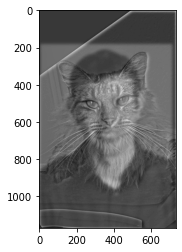

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: catface.jpg is a low contrast image
  del sys.path[0]


In [174]:
derek = read_image("sample_data/derek_aligned.jpg", True)/255
nutmeg = read_image("sample_data/nutmeg_aligned.jpg", True)/255

derek_low = get_low_freqs(derek, 10)/1.5
nutmeg_high = get_high_freqs(nutmeg, 10)

catface = np.divide(np.add(derek_low, nutmeg_high), 2)

matplotlib.pyplot.gray()
matplotlib.pyplot.imshow(catface)

matplotlib.pyplot.show()
skio.imsave("catface.jpg", catface)

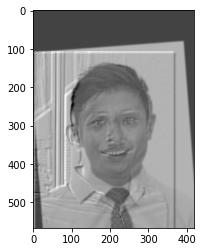

In [175]:
smile = read_image("sample_data/smile_aligned.jpg", True)
serious = read_image("sample_data/serious_aligned.jpg", True)

serious_low = get_low_freqs(serious, 0.1)
smile_high = get_high_freqs(smile, 0.1)

faces = np.divide(np.add(serious_low, smile_high), 2)

matplotlib.pyplot.gray()
matplotlib.pyplot.imshow(faces)

matplotlib.pyplot.show()
skio.imsave("faces.jpg", faces)

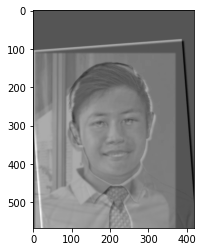

In [176]:
serious_high = get_high_freqs(serious, 0.1)
smile_low = get_low_freqs(smile, 0.1)

faces_2 = np.divide(np.add(serious_high, smile_low), 2)

matplotlib.pyplot.gray()
matplotlib.pyplot.imshow(faces_2)

matplotlib.pyplot.show()
skio.imsave("faces_2.jpg", faces_2)

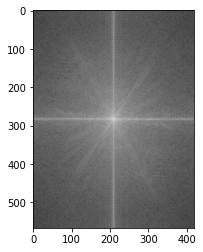

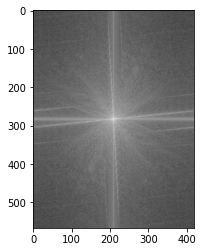

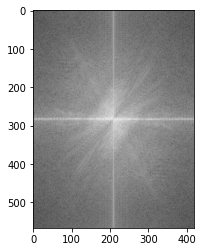

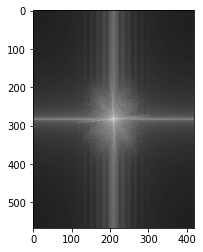

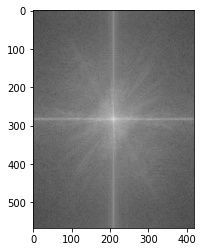

In [179]:
# Fourier Analysis
def get_fourier(im):
  return np.log(np.abs(np.fft.fftshift(np.fft.fft2(im))))

smile_fourier = get_fourier(smile)
serious_fourier = get_fourier(serious)
serious_low_fourier = get_fourier(serious_low)
smile_high_fourier = get_fourier(smile_high)
faces_fourier = get_fourier(faces)

matplotlib.pyplot.imshow(smile_fourier)
matplotlib.pyplot.show()
matplotlib.pyplot.imshow(serious_fourier)
matplotlib.pyplot.show()
matplotlib.pyplot.imshow(smile_high_fourier)
matplotlib.pyplot.show()
matplotlib.pyplot.imshow(serious_low_fourier)
matplotlib.pyplot.show()
matplotlib.pyplot.imshow(faces_fourier)
matplotlib.pyplot.show()

skio.imsave("smile_fourier.jpg", smile_fourier)
skio.imsave("serious_fourier.jpg", serious_fourier)
skio.imsave("serious_low_fourier.jpg", serious_low_fourier)
skio.imsave("smile_high_fourier.jpg", smile_high_fourier)
skio.imsave("faces_fourier.jpg", faces_fourier)

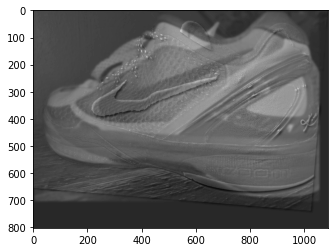

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: shoes.jpg is a low contrast image
  del sys.path[0]


In [178]:
if process:
    kobe = read_image("sample_data/kobe_aligned.jpg", True)/255
    hyperdunk = read_image("sample_data/hyperdunk_aligned.jpg", True)/255

    hyperdunk_low = get_low_freqs(hyperdunk, 1)
    kobe_high = get_high_freqs(kobe, 1)

    shoes = np.divide(np.add(hyperdunk_low, kobe_high), 2)

    matplotlib.pyplot.gray()
    matplotlib.pyplot.imshow(shoes)

    matplotlib.pyplot.show()
    skio.imsave("shoes.jpg", shoes)

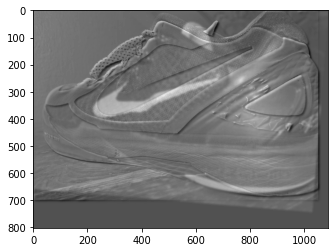

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: shoes_2.jpg is a low contrast image
  # Remove the CWD from sys.path while we load stuff.


In [177]:
if process:
    hyperdunk_high = get_high_freqs(hyperdunk, 1)
    kobe_low = get_low_freqs(kobe, 1)

    shoes_2 = np.divide(np.add(hyperdunk_high, kobe_low), 2)

    matplotlib.pyplot.gray()
    matplotlib.pyplot.imshow(shoes_2)

    matplotlib.pyplot.show()
    skio.imsave("shoes_2.jpg", shoes_2)

In [218]:
def gaussian_stack(im, sigma, layers):
  result = []
  next = im
  for layer in range(layers):
    result.append(next)
    gaussian_1D = cv2.getGaussianKernel(5, sigma)
    gaussian_2D = np.matmul(gaussian_1D, np.transpose(gaussian_1D))
    next = scipy.signal.convolve2d(next, gaussian_2D, mode='same')
    sigma = sigma * 2
  return result

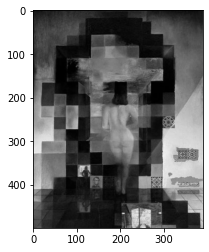

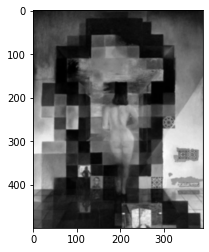

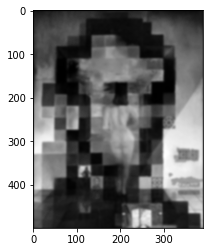

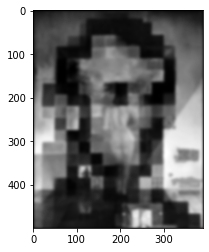

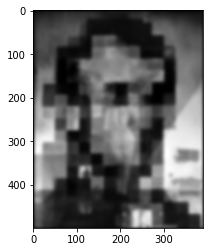

In [183]:
if process:
  lincoln = read_image("lincoln.jpg", True)
  g_stacks = gaussian_stack(lincoln, 1, 5)
  for i in range(len(g_stacks)):
    matplotlib.pyplot.imshow(g_stacks[i])
    matplotlib.pyplot.show()

    skio.imsave("lincoln_g_" + str(i) + ".jpg", g_stacks[i])

In [196]:
def laplacian_stack(im, sigma, layers):

  result = []
  next = im
  prev = im
  for layer in range(layers):
    gaussian_1D = cv2.getGaussianKernel(8, sigma)
    gaussian_2D = np.matmul(gaussian_1D, np.transpose(gaussian_1D))
    next = scipy.signal.convolve2d(prev, gaussian_2D, mode='same')
    pic = np.subtract(prev, next)
    result.append(pic)

    prev = next
    sigma = sigma * 2
  result.append(next)
  return result

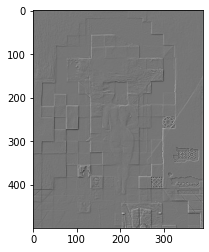

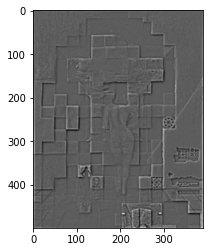

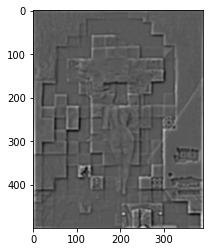

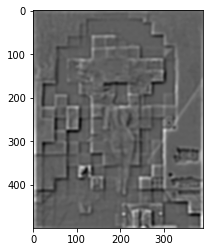

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: lincoln_l_3.jpg is a low contrast image
  """


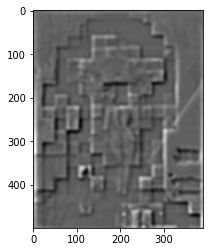

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: lincoln_l_4.jpg is a low contrast image
  """


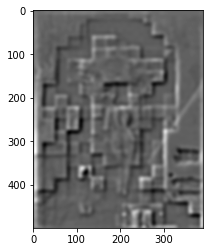

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: lincoln_l_5.jpg is a low contrast image
  """


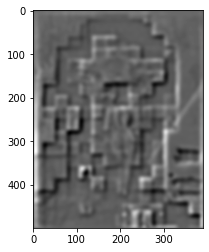

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: lincoln_l_6.jpg is a low contrast image
  """


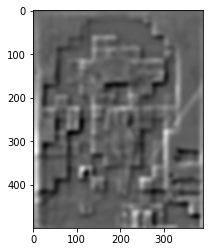

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: lincoln_l_7.jpg is a low contrast image
  """


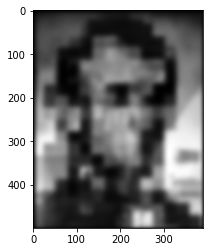

In [197]:
if process:
  l_stacks = laplacian_stack(lincoln, 1, 8)
  for i in range(len(l_stacks)):
    matplotlib.pyplot.imshow(l_stacks[i])
    matplotlib.pyplot.show()
    skio.imsave("lincoln_l_" + str(i) + ".jpg", l_stacks[i])

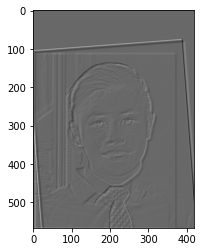

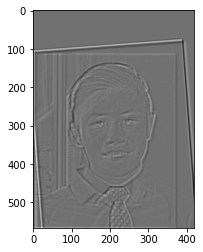

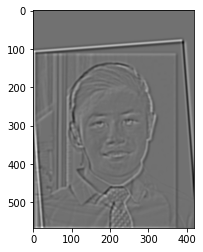

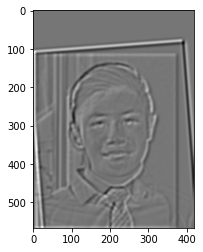

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: faces_l_3.jpg is a low contrast image
  """


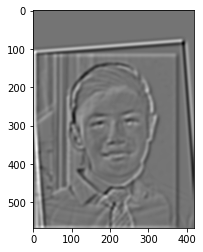

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: faces_l_4.jpg is a low contrast image
  """


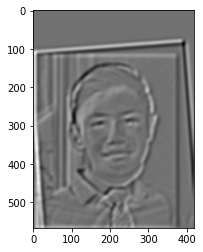

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: faces_l_5.jpg is a low contrast image
  """


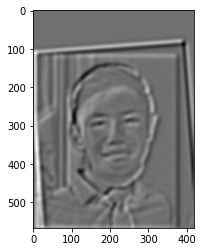

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: faces_l_6.jpg is a low contrast image
  """


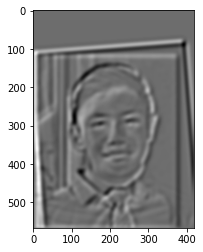

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: faces_l_7.jpg is a low contrast image
  """


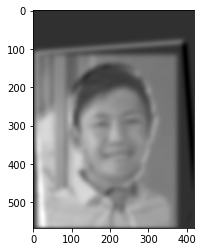

In [198]:
if process:
  faces_stacks = laplacian_stack(faces_2, 1, 8)
  for i in range(len(faces_stacks)):
    matplotlib.pyplot.imshow(faces_stacks[i])
    matplotlib.pyplot.show()
    skio.imsave("faces_l_" + str(i) + ".jpg", faces_stacks[i])

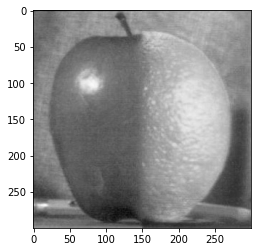

In [224]:
# 2.4 Image Splicing
if process:
  apple = read_image("sample_data/apple.jpeg", True)
  orange = read_image("sample_data/orange.jpeg", True)
  mask = read_image("sample_data/mask.jpg", True)

  apple_stacks = laplacian_stack(apple, 1, 49)
  orange_stacks = laplacian_stack(orange, 1, 49)
  mask_stacks = gaussian_stack(mask, 10, 50)

  result_stack = []
  for i in range(len(apple_stacks)):
    apple_layer = np.multiply(1-mask_stacks[i], apple_stacks[i])
    orange_layer = np.multiply(mask_stacks[i], orange_stacks[i])
    result_layer = np.add(apple_layer, orange_layer)
    result_stack.append(result_layer)

  result = np.zeros(apple.shape)
  for item in result_stack:
    result = np.add(result, item)

  matplotlib.pyplot.imshow(result)
  matplotlib.pyplot.show()

  skio.imsave("appleorange.jpg", result)

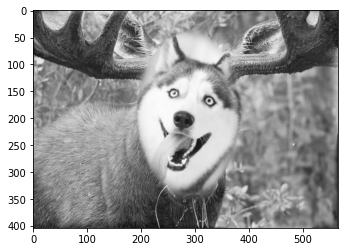

In [226]:
if process:
  husky = read_image("sample_data/husky_aligned.jpg", True)
  moose = read_image("sample_data/moose_aligned.jpg", True)
  mask_face = read_image("sample_data/mask_face.jpg", True)

  husky_stacks = laplacian_stack(husky, 1, 49)
  moose_stacks = laplacian_stack(moose, 1, 49)
  mask_face_stacks = gaussian_stack(mask_face, 10, 50)

  result_stack = []
  for i in range(len(husky_stacks)):
    husky_layer = np.multiply(mask_face_stacks[i], husky_stacks[i])
    moose_layer = np.multiply(1-mask_face_stacks[i], moose_stacks[i])
    result_layer = np.add(husky_layer, moose_layer)
    result_stack.append(result_layer)

  result = np.zeros(husky.shape)
  for item in result_stack:
    result = np.add(result, item)

  matplotlib.pyplot.imshow(result)
  matplotlib.pyplot.show()

  skio.imsave("moosehusky.jpg", result)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: seal_layer_0.jpg is a low contrast image
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: lion_layer_1.jpg is a low contrast image
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: seal_layer_1.jpg is a low contrast image
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: lion_layer_2.jpg is a low contrast image
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: seal_layer_2.jpg is a low contrast image
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: sealion_layer_2.jpg is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: lion_layer_3.jpg is a low contrast imag

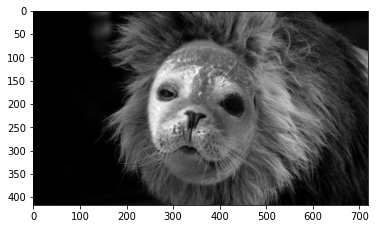

In [230]:
if process:
  lion = read_image("sample_data/lion_aligned.jpg", True)
  seal = read_image("sample_data/seal_aligned.jpg", True)
  mask_lion = read_image("sample_data/mask_lion.jpg", True)

  lion_stacks = laplacian_stack(lion, 1, 4)
  seal_stacks = laplacian_stack(seal, 1, 4)
  mask_lion_stacks = gaussian_stack(mask_lion, 10, 5)

  result_stack = []
  for i in range(len(lion_stacks)):
    lion_layer = np.multiply(1-mask_lion_stacks[i], lion_stacks[i])
    seal_layer = np.multiply(mask_lion_stacks[i], seal_stacks[i])
    result_layer = np.add(lion_layer, seal_layer)
    result_stack.append(result_layer)
    skio.imsave("lion_layer_" + str(i) + ".jpg", lion_layer)
    skio.imsave("seal_layer_" + str(i) + ".jpg", seal_layer)
    skio.imsave("sealion_layer_" + str(i) + ".jpg", result_layer)
    
  result = np.zeros(lion.shape)
  for item in result_stack:
    result = np.add(result, item)

  matplotlib.pyplot.imshow(result)
  matplotlib.pyplot.show()

  skio.imsave("lionseal.jpg", result)